# Grover search algorithm

In this section, we introduce Grover's search algorithm and how it can be used to solve unstructured search problems. We then implement Grover's algorithm on actual problems using Qiskit, run on a simulator and an actual quantum device.


## Contents

1. [Introduction](#introduction)      
2. [Setup](#setup)    
3. [Algorithm](#algorithm)     
   3.1 [Prepare the initial state](#algPrepare)    
   3.2 [Implement an oracle that can access the function $f(x)$ as a reflection](#algGrover)    
   3.3 [Apply the Grover diffusion operator](#algDiffusion)    
   3.4 [Repeat steps 2 and 3 approximately $\frac{\pi}{4}\sqrt{N}$ times and perform measurements](#algRepeat)    
   3.5 [Run the program with simulators and quantum devices](#algExecute)    


## Introduction <a id='introduction'></a>

In mathematical terms, [Grover’s algorithm](https://arxiv.org/abs/quant-ph/9605043) was the first to demonstrate a quantum speedup on unstructured search problems. Denote $N=2^n$ as the data size and $n$ as the qubit number. An oracle function $f(x)$ is defined with $f(x_0)=1$ for an unknown 'special point' $x_0$ and $f(x)=0$ for all other values of $x$. The problem is to find this 'special point' $x_0$ in a given set of values. For example, let's assume the qubit number is $n=3$ and the problem size is $N=2^3=8$ as a simple problem. We are given with the set composed of eight binary strings $\{000, 001, 010, 011, 100, 101, 110, 111\}$. Let's assume that the oracle function $f(x)$ is defined by
$$\begin{cases} f(x)= f(x_0)= 1, \text{ for } x = x_0, \\ f(x)=0, \text{ for } x \neq x_0. \end{cases}$$

We know that the 'special point' $x_0$ is one of the values in the set $\{000, 001, 010, 011, 100, 101, 110, 111\}$. Our problem is to find which string the $x_0$ is. Classically, we can use brute-force search algorithm to judge if each of the values satisfies the definition of the oracle function $f(x)$. Let's start with more detailed codes. As the length of `x0` is three, we use `abc` as a notation, where $a,b,c \in \{0, 1\}$ (e.g. $a=0,b=0,c=0$ means $x_0 = 000$). We assume the function $f(x)$ is the `AND` function of `a`, `b`, and `c`, which means that only when $a=1, b=1$, and $c=1$, the function $f(x)$ outputs $1$, while the function outputs $0$ for other values. Therefore, we can have these codes.

In [1]:
# Classical brute-force search algorithm, assume f(x) is the AND function
# Define the AND function
def ANDFunction(a, b, c):
    return a & b & c

In [2]:
# Create the list composed of eight strings
strings = ['000', '001', '010', '011', '100', '101', '110', '111']

# For each string, we check if it satisfies the function
for eachString in strings:
    print("Let's check this string: x =", eachString)
    
    # Map the string to three integers a, b, c
    a = int(eachString[0])
    b = int(eachString[1])
    c = int(eachString[2])
    print('a =', a, ' b =', b, ' c =', c)
    
    # Check if the output is 1
    output = ANDFunction(a, b, c)
    print("The output of the AND function f(x) is:", output)
    if output == 1:
        print(eachString, "is the special point x0! We found it!\n")
    else:
        print(eachString, "is not the special point x0.\n")

Let's check this string: x = 000
a = 0  b = 0  c = 0
The output of the AND function f(x) is: 0
000 is not the special point x0.

Let's check this string: x = 001
a = 0  b = 0  c = 1
The output of the AND function f(x) is: 0
001 is not the special point x0.

Let's check this string: x = 010
a = 0  b = 1  c = 0
The output of the AND function f(x) is: 0
010 is not the special point x0.

Let's check this string: x = 011
a = 0  b = 1  c = 1
The output of the AND function f(x) is: 0
011 is not the special point x0.

Let's check this string: x = 100
a = 1  b = 0  c = 0
The output of the AND function f(x) is: 0
100 is not the special point x0.

Let's check this string: x = 101
a = 1  b = 0  c = 1
The output of the AND function f(x) is: 0
101 is not the special point x0.

Let's check this string: x = 110
a = 1  b = 1  c = 0
The output of the AND function f(x) is: 0
110 is not the special point x0.

Let's check this string: x = 111
a = 1  b = 1  c = 1
The output of the AND function f(x) is: 1
11

Here, by performing the brute-force search, we succeed in finding the special point $x_0$ that satisfies the oracle function $f(x)$ such that $f(x_0)=1$. 

Here is a small exercise. If we have another function $g(x)$ defined by `OR` function, meaning that only when $a=0, b=0$, and $c=0$, the output of $g(x)$ is $0$, while $g(x)=1$ for all the other values. Also here, we change our goal from 'finding the special point $x_0$ that makes the output become $1$' into 'finding the special point $x_0$ that makes the output become $0$'.

In [3]:
# Exercise 1, if we have another function g(x) that is defined as the OR function
# Define the OR function
def ORFunction(a, b, c):
    return a or b or c

In [4]:
# Create the list composed of eight strings
strings = ['000', '001', '010', '011', '100', '101', '110', '111']

# For each string, we check if it satisfies the function
for eachString in strings:
    print("Let's check this string: x =", eachString)
    
    # Map the string to three integers a, b, c
    a = int(eachString[0])
    b = int(eachString[1])
    c = int(eachString[2])
    print('a =', a, ' b =', b, ' c =', c)
    
    ##############################################################################################
    # Please fill in your codes here to get the output of the function and check if the output is 0
    
    

Let's check this string: x = 000
a = 0  b = 0  c = 0
Let's check this string: x = 001
a = 0  b = 0  c = 1
Let's check this string: x = 010
a = 0  b = 1  c = 0
Let's check this string: x = 011
a = 0  b = 1  c = 1
Let's check this string: x = 100
a = 1  b = 0  c = 0
Let's check this string: x = 101
a = 1  b = 0  c = 1
Let's check this string: x = 110
a = 1  b = 1  c = 0
Let's check this string: x = 111
a = 1  b = 1  c = 1


Here we notice that in the exercise problem we succeed in finding the 'special point' $x_0$ at the first tryout. However, if the 'special point' $x_0$ is at the very end of your set just as the problem in the demonstration example, we do need to perform the brute-force search and check the values one by one. For the worst case, when the oracle function has $N$ possible input values, the best classical algorithm still needs $\mathcal{O}(N)$ evaluations. To make this process more efficient, we introduce [Grover’s algorithm](https://arxiv.org/abs/quant-ph/9605043). The advantage is that the algorithm only requires $\mathcal{O}(\sqrt{N})$ evaluations of the oracle, demonstrating a quantum speedup advantage over the classical computations. In this tutorial, we are going to implement a search for a three-bit string item using a quantum circuit based on Grover’s Algorithm. Formulating Grover's search problem requires an oracle function that marks one or more computational basis states as the states we are interested in finding, and a diffusion circuit that increases the amplitude of marked states, consequently suppressing the remaining states. 

## Setup  <a id='setup'></a>

First we use `pip` to install the packages that are required for this tutorial: `qiskit`, `pylatexenc`, `qiskit-aer`, and `qiskit-ibm-provider`.

In [5]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibm-provider

Then we import the packages and tools that we need for this tutorial.

In [6]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister

For example, let's assume the qubit number is $n=3$ and the problem size is $N=2^3=8$ as a small example. For simplicity, we assume the set is composed of eight binary strings $\{000, 001, 010, 011, 100, 101, 110, 111\}$. These eight strings have a natural correspondance to the three-qubit quantum computational basis set $\{|000\rangle, |001\rangle, |010\rangle， |011\rangle， |100\rangle， |101\rangle， |110\rangle， |111\rangle\}$. Let’s assume for now that only one string $x_0 \in \{000, 001, 010, 011, 100, 101, 110, 111\}$ satisfies $f(x)=f(x_0)=1$ while $f(x) = 0$ for any other $x \neq x_0 \in \{000, 001, 010, 011, 100, 101, 110, 111\}$  and our task is to find that string $x_0$. So we can create a quantum circuit with only three qubits and three classical bits as a small example.

In [7]:
# Initialize a quantum circuit with three qubits and three classical bits
n = 3
q = QuantumRegister(n,'q')
c = ClassicalRegister(n,'c')
groverCircuit = QuantumCircuit(q,c)

## Algorithm <a id='algorithm'></a>
The algorithm can be broken down into the following steps:
1. Prepare the initial state
2. Implement an oracle that can access the function $f(x)$ as a reflection
3. Apply the Grover diffusion operator
4. Repeat steps 2 and 3 approximately $\frac{\pi}{4}\sqrt{N}$ times and perform measurements
5. Run the program with simulators and quantum devices

### Step 1: prepare the initial state <a id='algPrepare'></a>
To perform the search, we are going to create an $n$-dimensional system, which has $N=2^n$ computational basis states, represented via $N$ binary numbers. More specifically, bit strings with length $n$, labelled as $x_0,x_1,\dots,x_{N-1}$. We initialize the system in the uniform superposition over all states, i.e., the amplitudes associated with each of the basis states are equal to
$$|s_n\rangle=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle.$$
Basically, for the three qubit example, the superposition state is given by $|s_3\rangle=\frac{1}{\sqrt{8}}\sum_{x=0}^{8-1}|x\rangle = \frac{1}{\sqrt{8}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle)$. This can be achieved by applying a Hadamard gate `H` to each wire in the circuit.

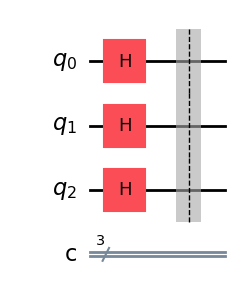

In [8]:
groverCircuit.h(q)
groverCircuit.barrier()
groverCircuit.draw(output='mpl', style="iqp")

### Step 2: implement an oracle that can access the function $f(x)$ as a reflection <a id='algGrover'></a>

Assume the solution string is $x_0=111$ for the above example. Let's dub the quantum state $|w\rangle = |x_0\rangle = |111\rangle$ that corresponds to the solution string as the **winner state**. And let's dub the quantum state $|b\rangle = \frac{1}{\sqrt{7}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle)$ that is composed of all other states as **bad state**. Then the three-qubit state $|s_3\rangle$ is given by the superposition of winner state and bad state such that $|s_3\rangle=\frac{1}{\sqrt{8}} |w\rangle + \frac{\sqrt{7}}{\sqrt{8}} |b\rangle$.

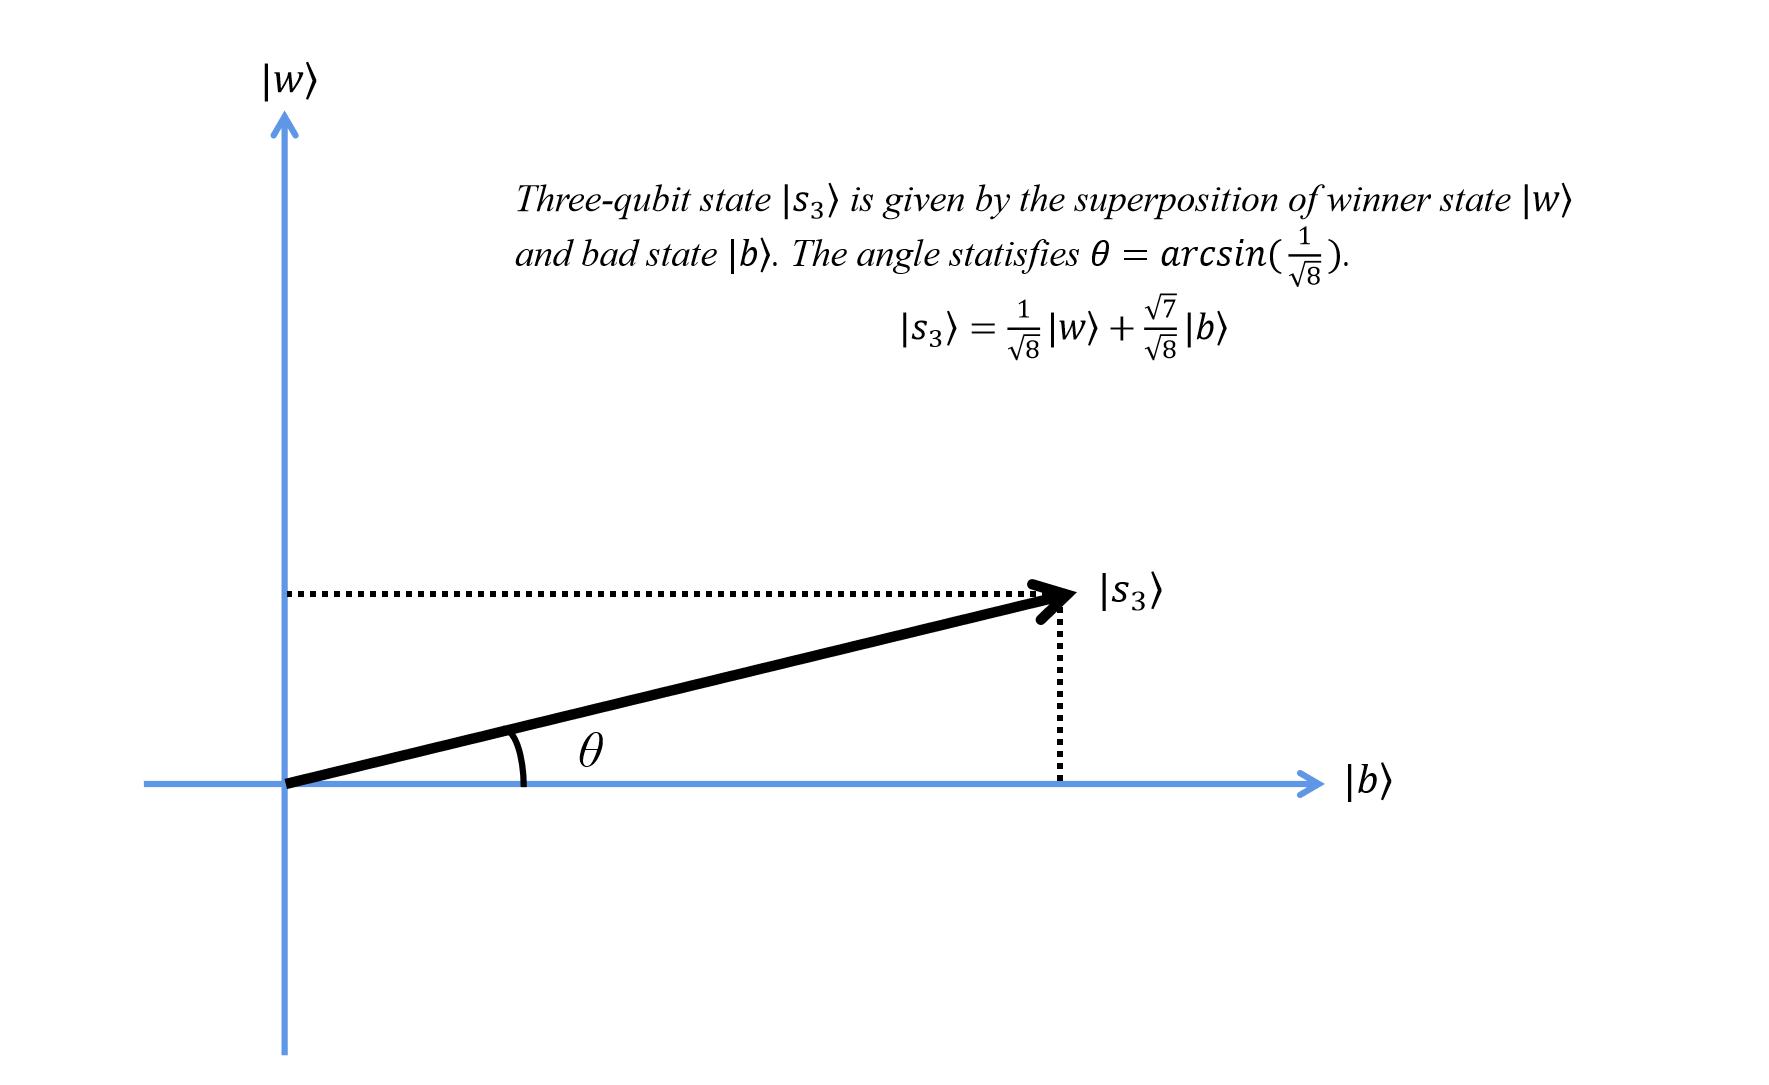




Let’s assume that only one index $x_0=111$ satisfies $f(x_0)=1$. To access $f(x)$ with an oracle, we can formulate a unitary operator $U_{f}$ such that $U_{f} | x \rangle = (-1)^{f(x)} | x \rangle$. To be specific, this oracle $U_{f}$ realizes the function given by

$$\begin{cases} U_{f} | x \rangle = - |x\rangle, \text{ for } |x\rangle = |w\rangle, \\ U_{f} | x \rangle = |x\rangle, \text{ for } |x\rangle = |b\rangle , \end{cases}$$


In other words, $U_{f}$ acts by flipping the phase of the winner state $|w\rangle$ while keeping the bad state $|b\rangle$ untouched. This can be recarded as a reflection operation over the reference state $|b\rangle$. By reflection, it means that the amplitude of the reference state $|b\rangle$ remains unchangled while the sign of the other state is flipped. This reflection operation will also be used in the next step. Applying the oracle $U_f$ to the superposition state gives us a new quantum state of $$U_{f}|s_3\rangle = - \frac{1}{\sqrt{8}} |w\rangle + \frac{\sqrt{7}}{\sqrt{8}} |b\rangle.$$

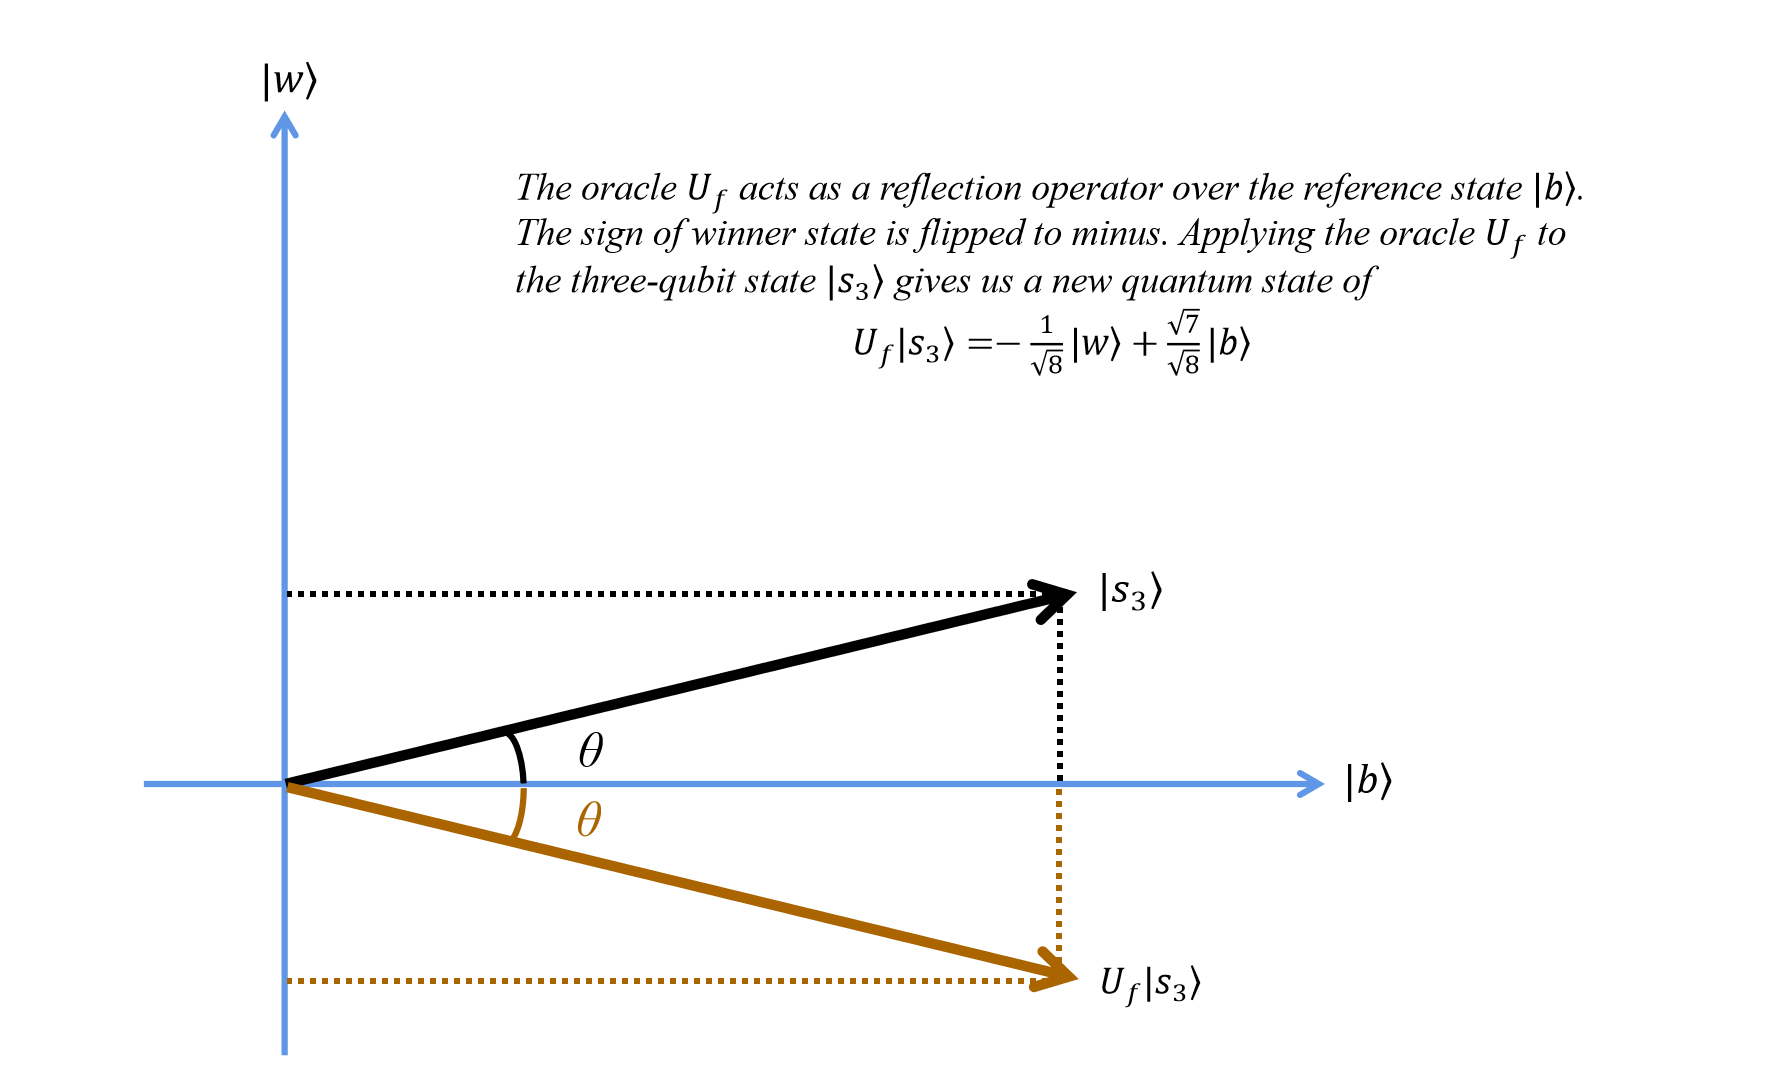

This operation can be achieved by applying a Controlled Controlled Z (`CCZ`) operation that flips the state $|111\rangle$ to $-|111\rangle$ while remaining the other states unchanged.
$$\begin{cases} [CCZ] | x \rangle = - |x\rangle, \text{ for } |x\rangle=|111\rangle, \\ [CCZ] | x \rangle = |x\rangle, \text{ for } |x\rangle \neq |111\rangle, \end{cases}$$



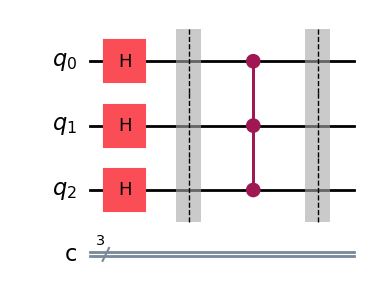

In [9]:
# Oracle operator
groverCircuit.ccz(q[0], q[1], q[2])
groverCircuit.barrier()
groverCircuit.draw(output='mpl', style="iqp")

### Step 3: apply the Grover diffusion operator <a id='algDiffusion'></a>

We now apply an additional reflection $U_{d}$ which is named as Grover diffusion operator. This operator is basically a reflection similar to the case as we discussed in the previous step, but simply changes the reference state $|b\rangle$ to the state $|s_3\rangle$. By reflection, it means that the amplitude of the reference state $|s_3\rangle$ remains unchangled while the sign of the amplitude of orthogonal state is flipped. Denote the quantum state that is orthogonal to $|s_3\rangle$ by $|s_3\rangle^{\perp}$. This operation realizes the function given by  
$$\begin{cases} U_{d} | x \rangle = - |x\rangle, \text{ for } |x\rangle = |s_3\rangle^{\perp}, \\ U_{d} | x \rangle = |x\rangle, \text{ for } |x\rangle = |s_3\rangle , \end{cases}$$
Similarly, this unitary $U_{d}$ can be written as
$$U_{d} = I - 2 |s_3\rangle^{\perp} \langle s_3|^{\perp}.$$
In the previous step, we decomposed $|s_3\rangle$ by the superposition of winner state and bad state $|s_3\rangle=\frac{1}{\sqrt{8}} |w\rangle + \frac{\sqrt{7}}{\sqrt{8}} |b\rangle$. So we can also decompose the orthogonal state $|s_3\rangle^{\perp}$ by the superposition of winner state and bad state $|s_3\rangle^{\perp}=-\frac{\sqrt{7}}{\sqrt{8}} |w\rangle + \frac{1}{\sqrt{8}} |b\rangle$. So the diffusion unitary operator can also be decomposed using winner state and bad state such that
$$U_{d}=I - 2 |s_3\rangle^{\perp} \langle s_3|^{\perp} = I - \frac{7}{4} |w\rangle \langle w| + \frac{\sqrt{7}}{4} |w\rangle \langle b| + \frac{\sqrt{7}}{4} |b\rangle \langle w| - \frac{1}{4} |b\rangle \langle b|.$$
Apply the Grover diffusion operator $U_d$ to the state $U_{f}|s_3\rangle$ gives us a new state of $$U_dU_{f}|s_3\rangle=\frac{5}{2}\frac{1}{\sqrt{8}}|w\rangle + \frac{1}{2}\frac{\sqrt{7}}{\sqrt{8}}|b\rangle.$$

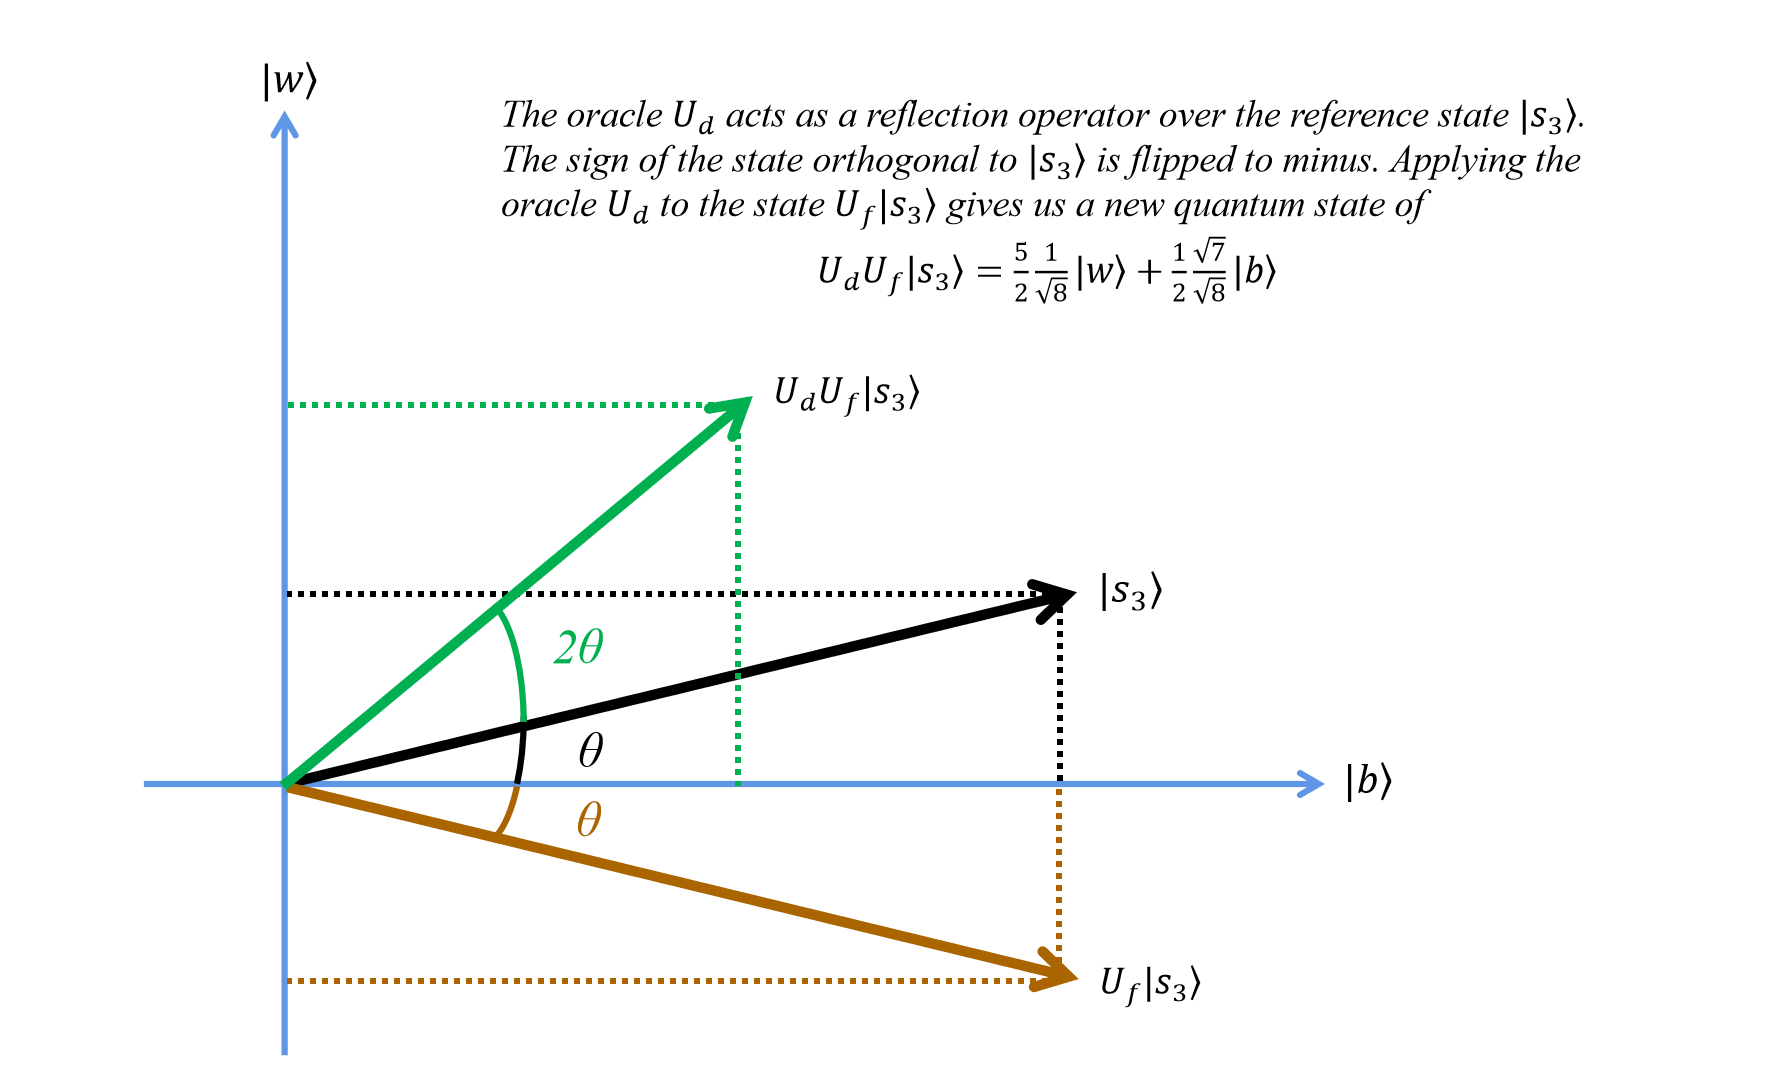

Now let's think about the circuit implementation of this Grover diffusion operator $U_d$. Recall that in the previous step, we use the Controlled Controlled Z (`CCZ`) operation to flip the state $|111\rangle$ to $-|111\rangle$ while remaining the other states unchanged. In quantum computation, the global phase of a quantum state does not matter for the task, as in most cases we only care about the density matrix or expectation value. So in the quantum computation scenario, we regard two quantum states with the only difference in global phase as the same quantum state, i.e. $|\psi\rangle \equiv e^{i\phi}|\psi\rangle$, for any $\phi \in [0, 2 \pi)$. As a special case of $\phi=\pi$, the quantum state $|\psi\rangle \equiv e^{i\pi}|\psi\rangle = -|\psi\rangle.$ So back to our discussion, if we extract a global phase of $e^{i\pi}$ out of the quantum state, we can also regard the `CCZ` operation as to remian the state $|111\rangle$ unchanged but flip all the signs of amplitude of the other states. Basically,
$$\begin{cases} [CCZ] | x \rangle = - |x\rangle, \text{ for } |x\rangle=|111\rangle, \\ [CCZ] | x \rangle = |x\rangle, \text{ for } |x\rangle \neq |111\rangle, \end{cases} \quad \equiv \quad \begin{cases} [CCZ] | x \rangle = |x\rangle, \text{ for } |x\rangle=|111\rangle, \\ [CCZ] | x \rangle = - |x\rangle, \text{ for } |x\rangle \neq |111\rangle, \end{cases} $$
up to a global phase of $e^{i\pi}$. This inspires us to explore about some modifications based on this magic `CCZ` gate. If we add two layer of X gates and Hadamard gates before and after the operation of `CCZ` gate sequentially to all the qubits, we can have the operation $H^{\otimes 3} X^{\otimes 3} [CCZ] X^{\otimes 3}H^{\otimes 3}$ composed of `X` gates, `H` gates, and `CCZ` gates. Recall the basic quantum gates `X` and `H` are given by
$$X|0\rangle = |1\rangle, X|1\rangle = |0\rangle, X|+\rangle = |+\rangle, X|-\rangle = -|-\rangle;$$
$$H|0\rangle = |+\rangle, H|1\rangle = |-\rangle, H|+\rangle = |0\rangle, H|-\rangle = |1\rangle,$$
where $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ is the plus state and $|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ is the minus state. We can verify that the operation $H^{\otimes 3} X^{\otimes 3} [CCZ] X^{\otimes 3}H^{\otimes 3}$ realizes the function given by
$$\begin{cases} H^{\otimes 3} X^{\otimes 3} [CCZ] X^{\otimes 3}H^{\otimes 3} | x \rangle = |x\rangle, \text{ for } |x\rangle = |+\rangle^{\otimes 3}, \\ H^{\otimes 3} X^{\otimes 3} [CCZ] X^{\otimes 3}H^{\otimes 3} | x \rangle = - |x\rangle, \text{ for } |x\rangle \neq |+\rangle^{\otimes 3}, \end{cases}$$

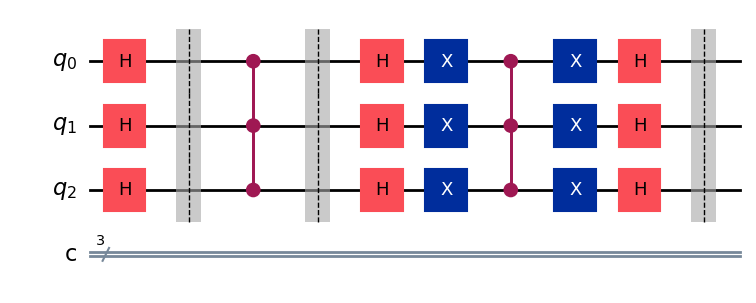

In [10]:
# Diffusion operator
groverCircuit.h(q)
groverCircuit.x(q)
groverCircuit.ccz(q[0], q[1], q[2])
groverCircuit.x(q)
groverCircuit.h(q)
groverCircuit.barrier()
groverCircuit.draw(output='mpl', style="iqp")

In [11]:
# add description of amplification

### Step 4: repeat steps 2 and 3 approximately $\frac{\pi}{4}\sqrt{N}$ times and perform measurements <a id='algRepeat'></a>

Compare the state $U_dU_f|s_3\rangle=\frac{5}{2}\frac{1}{\sqrt{8}}|w\rangle + \frac{1}{2}\frac{\sqrt{7}}{\sqrt{8}}|b\rangle$ to the original state $|s_3\rangle=\frac{1}{\sqrt{8}} |w\rangle + \frac{\sqrt{7}}{\sqrt{8}} |b\rangle$. We can notice that the amplitude of the winner state $|w\rangle$ increases after applying the Grover oracle $U_f$ and the diffucion operator $U_d$. Our goal for the problem is to make the state evolve to the solution eventually. We can derive how many times do we need in order to get the winner state. Notice that each time after the Grover oracle $U_f$ and the diffucion operator $U_d$, the quantum state is rotated towards the winner state by the angle of $2\theta$, where $\theta = \arcsin{\frac{1}{\sqrt{N}}}$. When the size of the dataset $N$ is large, the angle is approximately calculated by $\theta = \arcsin{\frac{1}{\sqrt{N}}}\approx \frac{1}{\sqrt{N}}$. Assume we iterate the Grover oracle and diffusion operator for $k$ times in order to rotate the initial state to the winner state by the angle of $\frac{\pi}{2}$. Then $k$ is obtained by $2\theta \times k = \frac{\pi}{2}$ such that $k = \frac{\pi}{4}\sqrt{N}.$ So after $k = \frac{\pi}{4}\sqrt{N}$ iterations of the algorithm, we can get the solution as the winner state $|w\rangle$.






For the above example of $N=8$, we can iterate the algorithm for $2$ times and then measure all the qubits. By computing the statistics of measurement output, we can have a probability distribution such that the probability of bit string `111` is the highest.

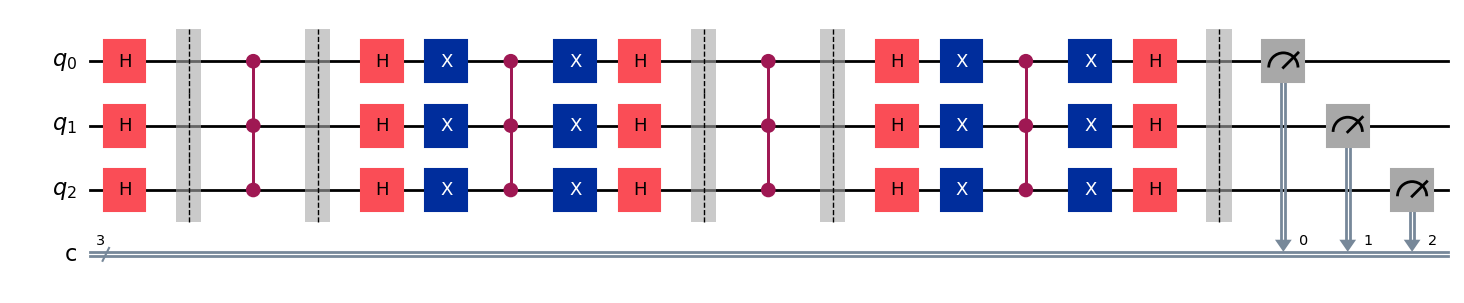

In [12]:
# Repeat the oracle and diffusion operator one more time and measure the output

# Oracle operator
groverCircuit.ccz(q[0], q[1], q[2])
groverCircuit.barrier()

# Diffusion operator
groverCircuit.h(q)
groverCircuit.x(q)
groverCircuit.ccz(q[0], q[1], q[2])
groverCircuit.x(q)
groverCircuit.h(q)
groverCircuit.barrier()

# Measurement
groverCircuit.measure(q, c)

groverCircuit.draw(output='mpl', style="iqp")

### Step 5: run the program with simulators and quantum devices <a id='algExecute'></a>
Now we have elaborated every details of Grover search algorithm and designed the circuit for implementation. It's time to execute our program with `Aer` simulator and quantum hardware on IBM Quantum platform.

In [13]:
# Run the program and get results by simulators
from qiskit import transpile
from qiskit_aer import AerSimulator

# Get the backend for simulation
simulatorBackend = AerSimulator()

# Before we run the circuit, we need to transpile the circuit to match the backend structure
transpiledGrovercircuit = transpile(groverCircuit, simulatorBackend)

# Run job
shots = 1024
job = simulatorBackend.run(transpiledGrovercircuit, shots=shots)

# Get the result and print the counts
result = job.result()
count = result.get_counts()
print(count)

{'111': 976, '101': 9, '100': 6, '000': 8, '110': 9, '001': 8, '011': 7, '010': 1}


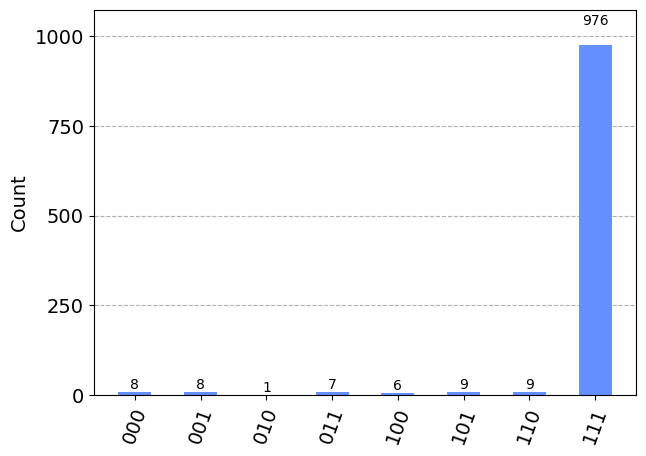

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(count)

We can see from the figure that the bit string `111` has the highest probability which corresponds to our solution. Alternatively, we can also run the program using real quantum devices from IBM Quantum platform. But as the IBM Quantum platform requires access to the cloud server, we are not presenting the details here.